In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

In [17]:
#genarating the data
X_train=np.linspace(-1,1,20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [18]:
X_test=np.linspace(-1,1,20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

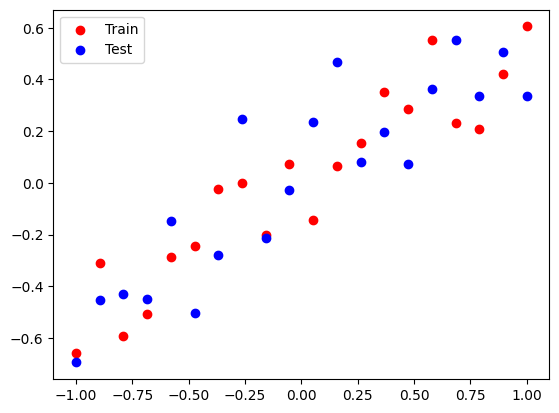

In [19]:
plt.scatter(X_train,y_train,c='red',label='Train')
plt.scatter(X_test,y_test,c='blue',label='Test')
plt.legend()
plt.show()

In [20]:
#regrssion model
model_1=Sequential()
model_1.add(Dense(128,input_dim=1,activation='relu'))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.01)
model_1.compile(loss='mse',optimizer=adam,metrics=['mse'])
history=model_1.fit(X_train,y_train,epochs=500,
                    validation_data=(X_test,y_test),
                    verbose=0)

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
_,train_mse=model_1.evaluate(X_train,y_train,verbose=0)
_,test_mse=model_1.evaluate(X_test,y_test,verbose=0)
print(f'Train.{train_mse}, Test:{test_mse}')

Train.0.004043318331241608, Test:0.045281264930963516


In [22]:
y_pred1=model_1.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


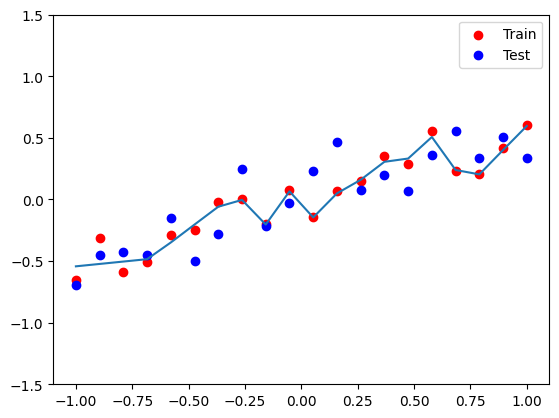

In [23]:
plt.figure()
plt.scatter(X_train,y_train,c='red',label='Train')
plt.scatter(X_test,y_test,c='blue',label='Test')
plt.plot(X_test,y_pred1)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

In [24]:
#dropout model
#regrssion model
model_2=Sequential()
model_2.add(Dense(128,input_dim=1,activation='relu'))
model_2.add(Dropout(0.2))#probablity of node being dropout is 0.2
model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.2))#probablity of node being dropout is 0.2
model_2.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.01)
model_2.compile(loss='mse',optimizer=adam,metrics=['mse'])
history=model_2.fit(X_train,y_train,epochs=500,
                    validation_data=(X_test,y_test),
                    verbose=0)

In [25]:
#evaluating the model
_,train_mse=model_2.evaluate(X_train,y_train,verbose=0)
_,test_mse=model_2.evaluate(X_test,y_test,verbose=0)
print(f'Train.{train_mse}, Test:{test_mse}')

Train.0.011450499296188354, Test:0.03761531040072441


In [26]:
y_pred2=model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


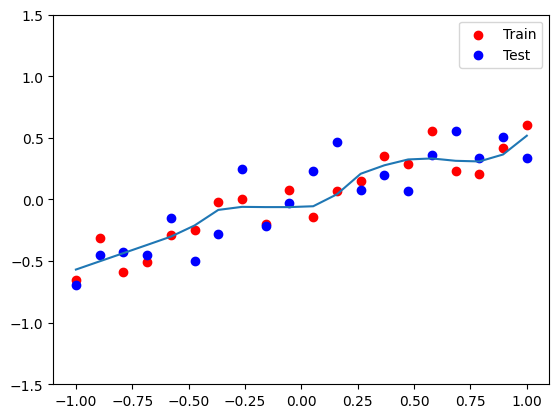

In [27]:
plt.figure()
plt.scatter(X_train,y_train,c='red',label='Train')
plt.scatter(X_test,y_test,c='blue',label='Test')
plt.plot(X_test,y_pred2)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()